# Sparks Foundation
#### Author: Tushar Vij
## Task1 : Prediction using supervised Machine Learning


In [36]:
#importing lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
#importing dataset
t1_data=pd.read_csv('http://bit.ly/w-data')
print("The head of the data set is: ")
t1_data.head()

The head of the data set is: 


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [38]:
#exploratory analysis of data set
#checking if there is any null value
t1_data.isnull==True

False

In [39]:
#details of the data set
t1_data.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Since there is no null value we can move to data visualization

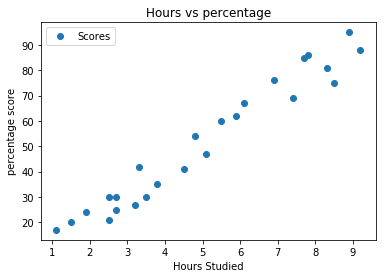

In [40]:
t1_data.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs percentage')
plt.xlabel('Hours Studied')
plt.ylabel('percentage score')
plt.show()

### The relation is linear so we can plot the regression line

In [41]:
#preparing the data

x=t1_data.iloc[:, :-1].values
y=t1_data.iloc[:, 1].values

In [42]:
#splitting data into training data set and test data set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


In [43]:
#fitting the data into model
from sklearn.linear_model import LinearRegression

l_reg = LinearRegression()
l_reg.fit(x_train, y_train)

print("Training completed")

Training completed


C:\Users\TUSHAR VIJ\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


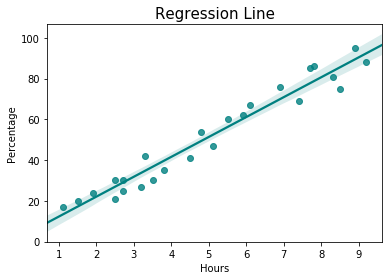

In [44]:
#plotting the regression line
import seaborn as sns

sns.regplot(x= t1_data['Hours'], y= t1_data['Scores'], color= 'teal')
plt.title('Regression Line',size=15)
plt.ylabel('Percentage')
plt.xlabel('Hours')
plt.show()


In [45]:
#predicting the data set
y_pred=l_reg.predict(x_test)

In [46]:
#comparing actual marks and predicted marks
c_marks = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
c_marks


,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### evaluating the model


In [47]:
from sklearn import metrics

print("Mean Squared error is ", metrics.mean_squared_error(y_test,y_pred))
print("Mean Absolute Error is ", metrics.mean_absolute_error(y_test,y_pred))
print('Root Mean Square Error :',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Squared error is  21.5987693072174
Mean Absolute Error is  4.183859899002975
Root Mean Square Error : 4.6474476121003665


In [48]:
#predicting score if a student studies for 9.25 hours per day
hrs=9.25
pred_st=l_reg.predict([[hrs]])
print("Number of hours = ",hrs)
print("Predicted Score = {}".format(pred_st[0]))


Number of hours =  9.25
Predicted Score = 93.69173248737538
